<a href="https://colab.research.google.com/github/thelastbeto/Recommendation_System/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo nossa base de dados

In [1]:
# Utilizaremos a API do Spotify.
# https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features

# Instalando o PySpark

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=a6e3bc6f0f55ce26d4d7f747ae6e10ec25e14c7b8cc04675b055c940e2127b27
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
# Montando uma máquina para que possamos interagir com o SPARK.
from pyspark.sql import SparkSession

In [4]:
# Criando a sessão
session = SparkSession.builder\
.appName("Recommendation System With PySpark")\
.getOrCreate()

session

# Leitura e Análise dos Dados

In [5]:
# A biblioteca para melhor realização das leituras e analises dos nossos dados é a spark.sql.
# Doc: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html
from pyspark import SparkFiles

In [6]:
# Lendo nossa url diretamente no github.
url_dados = 'https://github.com/thelastbeto/Recommendation_System/blob/main/dados_musicas.csv?raw=true'
session.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')


# Definida uma variável url_dados, que contém o URL de um arquivo CSV hospedado no GitHub.
# Session.sparkContext.addFile(url_dados) é chamado. session é uma instância de SparkSession, e sparkContext é o contexto Spark associado a essa sessão. A função addFile é usada para adicionar o arquivo do URL especificado ao contexto Spark.
# A função SparkFiles.get('dados_musicas.csv') é usada para obter o caminho do arquivo adicionado. SparkFiles é uma classe fornecida pelo PySpark que permite acessar arquivos que foram adicionados ao contexto Spark.

In [7]:
# Atribuindo nosso arquivo a uma variável dados e aplicando a leitura do que vamos trabalhar em seguida.
dados = session.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)

In [8]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [9]:
# verificando se nossos tipos estão corretos.
dados.printSchema()

# Muitas vezes precisaremos realizar o tratamento das colunas dos nossos dados para continuar o processo. Porém, neste caso, como temos em mãos dados já tratados pelo spotify, não precisaríamos realizar tal tratamento.

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [10]:
# Verificando a quantidade de dados que nós temos para trabalhar:
dados.count()

20311

In [11]:
# quantidade de colunas
len(dados.columns)

19

In [12]:
# Importando as funcoes do pyspark para que possamos iniciar o tratamento de nossos dados.
# Documentação: https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html
import pyspark.sql.functions as f

In [13]:
# verificando os valores nulos
dados.select([f.count(f.when(f.isnull(c), 1)). alias(c)for c in dados.columns]).show()

# f.count -> Esta é uma função de agregação do Spark que conta o número de valores não nulos.
# f.when -> que é uma forma condicional em PySpark.
# f.isnull -> Verifica se um determinado valor é nulo. Se for, podemos passar algum número de retorno para que ele nos informe. Na lógica atual, verifica se o valor na coluna c é nulo. Se for nulo, ele retorna 1, caso contrário, retorna 0.

# O código está contando o número de valores nulos em cada coluna do DataFrame dados e exibindo os resultados em um formato tabular. Esta é uma lista de compreensão que percorre todas as colunas em dados, aplicando a lógica descrita para contar os valores nulos em cada uma delas.

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [14]:
# base de dados restrita de 2000 a 2020;
print(sorted(dados.select('year').distinct().collect()))

# O código está selecionando a coluna 'year' do DataFrame dados, em seguida, usando a função distinct() para encontrar os valores únicos nessa coluna. Posteriormente, collect() é usado para coletar esses valores únicos como uma lista de linhas do DataFrame. Por fim, sorted() é usado para ordenar essa lista de valores únicos e print() para exibir o resultado.

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## Análise da base dados por Ano

In [15]:
# Extraindo uam nova base de dados - Anos
url_dados_anos = 'https://github.com/thelastbeto/Recommendation_System/blob/main/dados_musicas_ano.csv?raw=true'

session.sparkContext.addFile(url_dados_anos)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = session.read.csv(path_dados_file, header=True, inferSchema=True)

In [16]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [17]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [18]:
dados_anos.count()

21

In [19]:
len(dados_anos.columns)

14

In [20]:
# utilização do ToPandas -> Ele vai pegar todos os dados e trazer apenas para um nó, diferentemente do Spark. Com isso, caso tenhamos uma base com muitos dados, podemos sobrecarregar o nó e ter um estouro de memória.

In [21]:

import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title= 'Variação do loudness conforme os anos')
fig


# Importação da biblioteca Plotly Express para que possamos criar um gráfico de linha a fim de mostrar a variação do loudness a partir dos anos 2000;
# Cria o gráfico de linha. px.line é usado para criar um gráfico de linha, e dados_anos.toPandas() converte o DataFrame Spark dados_anos em um DataFrame Pandas, que é o formato necessário para o Plotly Express. Os parâmetros x e y especificam as colunas do DataFrame a serem usadas como eixo x e eixo y, respectivamente. markers=True indica que desejamos que os pontos de dados sejam exibidos no gráfico. O parâmetro title define o título do gráfico.
# Portanto, ao executar este código, ele criará um gráfico de linha mostrando a variação do loudness ao longo dos anos, com os anos no eixo x e os valores de loudness no eixo y. Os pontos de dados serão marcados no gráfico, e o título será "Variação do loudness conforme os anos".

In [22]:
import plotly.graph_objects as go


# Enquanto o Plotly Express é uma interface de alto nível que simplifica a criação de gráficos comuns, o Plotly.graph_objects permite um controle mais granular sobre a aparência e o comportamento dos gráficos.
# A biblioteca Plotly.graph_objects é ideal quando você precisa de controle total sobre a aparência e o comportamento dosgráficos, e quando deseja criar visualizações de dados altamente personalizadas e interativas.



In [23]:
# Traçaremos um novo gráfico para que possamos tentar encontrar alguam correlação dos anos com as características das músicas.
fig2 = go.Figure()

temp = dados_anos.toPandas()

fig2.add_trace(go.Scatter(x = temp['year'], y =temp['acousticness'], name='Acousticness'))
fig2.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig2.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig2.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig2.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig2.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig2.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig2.show()

# fig2 = go.Figure(): Cria uma nova figura vazia usando a classe Figure do Plotly.graph_objects. Esta figura será usada para adicionar os traços do gráfico.
# temp = dados_anos.toPandas(): Converte o DataFrame Spark dados_anos em um DataFrame Pandas. Isso é necessário porque o Plotly.graph_objects funciona melhor com DataFrames Pandas.
# Ao final, fig2 conterá um gráfico de linhas com as características mencionadas representadas ao longo dos anos. Cada característica será exibida como uma linha distinta no gráfico, com os anos no eixo x e os valores correspondentes no eixo y.

### Matriz de Correlação

In [24]:
fig2 = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig2.show()

# A função corr() é então aplicada a esse DataFrame Pandas para calcular a matriz de correlação entre as colunas.
# px.imshow(...): Isso cria o mapa de calor a partir da matriz de correlação. -> O parâmetro text_auto=True permite que os valores sejam exibidos automaticamente no mapa de calor.
# O foco será construir um mapa de calor que poderá visualizar a matriz de correlação entre as diferentes variáveis do DataFrame "dados_anos". Muito útil para que possemos encontrar padrões de correlação entre as variáveis e entender a relação umas com as outras.

# Clusterização por gênero musical

In [25]:
# Leitura dos dados, agora, por genero musical.
url_dados_generos = 'https://github.com/thelastbeto/Recommendation_System/blob/main/dados_musicas_genero.csv?raw=true'

session.sparkContext.addFile(url_dados_generos)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_genero.csv')

dados_generos = session.read.csv(path_dados_file, header=True, inferSchema=True)

In [26]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [27]:
dados_generos.count()

2973

In [28]:
dados_generos.select('genres').distinct().count()

2973

In [29]:
len(dados_generos.columns)

14

In [30]:
# Técnica PCA - cria componentes que representam a variação dos dados
# Técnica StandardScale - Permite que todas as nossas colunas estejam na mesma escala

# - Sensivel a escala dos dados;
# -

In [31]:
# importação da VectorAssembler, que é uma ferramenta muito útil ao trabalhar com conjuntos de dados que possuem muitas colunas de recursos (features) e você deseja combinar essas colunas em uma única coluna de vetor.
from pyspark.ml.feature import VectorAssembler

In [32]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [33]:
# Estamos atribuindo as colunas dos dados_generos a uma variável e removendo a coluna 'genres'.
x = dados_generos.columns
x.remove('genres')
x

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [34]:
# Estamos utilizando o VectorAssembler para criar uma coluna (features) onde teremos os dados para trabalhar.
dados_generos_vector = VectorAssembler(inputCols=x, outputCol = 'features').transform(dados_generos).select(['features', 'genres'])

# Cria uma nova coluna chamada 'features' que contém os vetores combinados das colunas especificadas em x e, em seguida, estamos selecionando as colunas que contém os vetores combinados das colunas de x e genres.

In [35]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [36]:
# realizando o standardScaler
from pyspark.ml.feature import StandardScaler

# É um transformador que normaliza um conjunto de recursos (features) para ter uma média zero e uma variância unitária, escalando cada recurso individualmente. Isso é útil porque muitos algoritmos de aprendizado de máquina assumem que os dados estão normalizados, o que pode ajudar a melhorar o desempenho do modelo.
# Isso é especialmente útil quando as features estão em escalas diferentes e você deseja que todas tenham a mesma importância durante o treinamento do modelo.
# Features em escalas diferentes são aquelas que possuem valores com intervalos distintos. Ex: idade 0 a 50 anos; Salario 1000 a 3000;

In [37]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector) # Pega a inputCol e transforma na outputcol

# Criação de um objeto StandardScaler, seguido de um ajuste no Scaler ao conjunto de dados usando o método fit.

# - O StandardScaler usará a coluna 'features' como entrada e produzirá uma nova coluna chamada 'scaled_features' com os dados normalizados.
# - scaler_model = scaler.fit(dados_generos_vector) - Ajuste do Standard Scaler ao nosso conjunto de dados "dados_generos_vector". O método fit calcula estatísticas (como média e desvio padrão) dos dados de entrada (a coluna 'features') e usa essas estatísticas para normalizar os dados.
# - Aplica o modelo de scaler (scaler_model) que foi ajustado anteriormente ao conjunto de dados dados_generos_vector. Isso é feito para normalizar as features do conjunto de dados.

In [38]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [39]:
# Ténica de PCA - Vamos reduzir 14 colunas para 2.
from pyspark.ml.feature import PCA

# A classe PCA no Spark MLlib permite ajustar um modelo PCA a um conjunto de dados e, em seguida, usar esse modelo para transformar o conjunto de dados em seus componentes principais. Isso pode ser útil para reduzir a dimensionalidade do conjunto de dados antes de aplicar técnicas de aprendizado de máquina ou para visualização de dados em menor dimensionalidade.
# É usada para realizar Análise de Componentes Principais
# A Análise de Componentes Principais é uma técnica de redução de dimensionalidade que é comumente usada para reduzir a quantidade de features em um conjunto de dados, mantendo ao mesmo tempo a maior parte da variabilidade dos dados
# Os componentes principais são ordenados por sua importância em explicar a variabilidade dos dados, com o primeiro componente principal explicando a maior parte dessa variabilidade, o segundo componente principal explicando a segunda maior parte, e assim por diante.

In [40]:
#def pca_features(dados, qtdd):
 # pca = PCA(k=qtdd, inputCol='scaled_features', outputCol = 'pca_features')
  #model_pca = pca.fit(dados)
  #dados_generos_pca = model_pca.transform(dados)
  #dados_generos_pca.show()

#pca_features(dados_generos_scaler, 2)



pca = PCA(k=2, inputCol='scaled_features', outputCol = 'pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

# k=2: Especifica que você deseja reduzir a dimensionalidade para 2 componentes principais.
# inputCol='scaled_features': Indica que a coluna de entrada para o PCA é 'scaled_features', que é a coluna contendo as features normalizadas.
# outputCol='pca_features': Define o nome da coluna de saída onde os componentes principais serão armazenados.

In [41]:
dados_generos_pca.show()

+--------------------+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|        pca_features|
+--------------------+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|[-2.5070953668885...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|[0.59696790566334...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|[4.15846027622355...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|[2.38734487851221...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|[2.65012183716790...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|[1.49650912033676...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|[3.92352077215732...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|[4.61101110983111...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101

In [42]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [43]:
# Vamos criar um pipeline para salvar todos os nossos passos de transformação dos dados.
from pyspark.ml import Pipeline

# Pipeline -> serve para organizar e encadear várias etapas de processamento de dados e modelagem em um único fluxo de trabalho.
# Vantagens de utilização da pipeline: Encadeamento de etapas de pré-processamento, treinamento de modelos em sequência, facilidade de reprodução, ajuste conjunto de parâmetros

In [44]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=x, outputCol = 'features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol = 'pca_features')])

# Atribuindo todos os nossos passos à pipeline.

In [45]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)
# Ajustando nossa pipeline ao nosso conjunto de dados bruto.

In [46]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)
# realizando as transformações em nossa pipeline após o ajuste dos dados.

In [47]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [48]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

### Utilizando K-MEANS

In [49]:
from pyspark.ml.clustering import KMeans

# KMeans é um algoritmo de clustering muito popular que é usado para agrupar conjuntos de dados em grupos, chamados de clusters, baseados em características semelhantes.

# Clustering de Dados - Você pode usar o algoritmo KMeans para agrupar seus dados em clusters -> divisão dos dados em clusters onde tenhas pontos de semelhança entre si.
# Identificação do número de clusters -> Utilização do algoritmo KMeans para ajudar a identificar o número ideal de clusters para os nossos dados.

In [50]:
SEED = 1224 #Salvando uma variavel de valor chave SEED

In [51]:
kmeans = KMeans(featuresCol = 'pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED) # K - Quantidade de clusters que queremos criar / #

# KMeans: Esta é a classe que implementa o algoritmo de K-means em PySpark.
# featuresCol: Define a coluna do DataFrame de entrada que contém os recursos a serem usados para o agrupamento -> sendo trabalhada uma coluna de pca.
# predictionCol: Define o nome da coluna no DataFrame de saída que conterá as previsões dos clusters para cada ponto de dados.
# setK(5): Define o número de clusters que o algoritmo K-means deve tentar identificar. Neste caso, está definido para 5 clusters.
# .setSeed: Define uma semente para a aleatoriedade do algoritmo. A semente é importante para garantir que os resultados sejam reproduzíveis. A variável SEED deve conter algum valor numérico que será usado como semente.

In [52]:
model_kmeans = kmeans.fit(dados_generos_pca)
# Ajustando os dados de kmeans ao modelo.

In [53]:
predictions_kmeans = model_kmeans.transform(dados_generos_pca)
# transformando as colunas.

In [54]:
predictions_kmeans.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+-----------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|cluster_pca|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+-----------+
|   1|21st century cla

In [55]:
predictions_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|2          |
|[0.596967905663348,-4.981612052751353]    |2          |
|[4.158460276223559,0.83665250810799]      |4          |
|[2.3873448785122156,0.4877989015663361]   |0          |
|[2.650121837167907,0.575681976882043]     |0          |
|[1.4965091203367622,-1.8644183183717828]  |2          |
|[3.9235207721573224,-0.28518350023528705] |4          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |0          |
|[4.698331383924286,-1.2765569680619455]   |3          |
|[3.375987496679866,-0.7560741064307498]   |4          |
|[5.608998877066019,-1.042731164439324]    |1          |
|[-0.2954946352117699,0.2763864586236268]  |2          |
|[2.572559106287041,1.316981543

### Plotando o clustering

In [56]:
from pyspark.ml.functions import vector_to_array as va

In [57]:
pca_features_xy = predictions_kmeans.withColumn('x', va('pca_features')[0])\
.withColumn('y', va('pca_features')[1])\
.select(['x', 'y', 'cluster_pca', 'genres'])


# A primeira linha adiciona a coluna x ao dataframe prediction_kmeans, convertendo a pca_features de vetor para matriz e capturando o valor na posição 0, sendo a primeira dimensão do vetor PCA.
# A segunda linha tem o mesmo funcionamento da primeira, porém, adiciona uma coluna chamada y ao nosso DF e em seguida, captura o elemento 1 da matriz, ou seja, a segunda posição.
# Cria o dataframe pca_features_xy com base nas colunas selecionadas.

In [58]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

In [59]:
fig3 = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig3.show()

# px.scatter: Este é o método de Plotly Express para criar um gráfico de dispersão.
# pca_features_xy.toPandas(): Esta chamada de método converte o DataFrame pca_features_xy do PySpark para um DataFrame do Pandas. Isso é necessário porque o Plotly Express trabalha diretamente com DataFrames do Pandas.
# x='x', y='y': Aqui, definimos as colunas 'x' e 'y' do DataFrame como as coordenadas x e y do gráfico de dispersão.
# color='cluster_pca': Esta opção define a cor dos pontos do gráfico com base nos valores da coluna 'cluster_pca'. Cada valor único nessa coluna corresponderá a uma cor diferente.
# hover_data=['x', 'y', 'genres']: Define os dados que serão exibidos quando o cursor do mouse passar sobre um ponto do gráfico. Neste caso, ele exibirá as coordenadas 'x' e 'y', bem como a coluna 'genres' para o ponto em questão.

In [60]:
pca_pipeline_model.stages[2].explainedVariance #os valores apontam que o nosso primeiro componente tem uma taxa de explicação de 3 variáveis e a 2 está explicando apenas 1.
# retorna um vetor que contém as frações de variância explicada por cada componente principal, em ordem decrescente. O comprimento deste vetor será igual ao número de componentes principais especificado quando o modelo PCA foi ajustado.

DenseVector([0.2975, 0.1212])

In [61]:
# Com isso, vemos que estamos perdendo muita informação, onde a nossa PCA com diversas informações, não conseguiu explicar bem os nossos dados.

# Clusterização por música

### Redução de dimensionalidade

In [62]:
# Vamos trabalhar com nossos dados gerais após realizar algumas fases de testes em outros dados disponíveis.

In [63]:
x = dados.columns
x.remove('artists')
x.remove('id')
x.remove('name')
x.remove('artists_song')
x

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [64]:
dados_encoded_vector = VectorAssembler(inputCols=x, outputCol = 'features').transform(dados)

In [65]:
dados_encoded_vector.select('features').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
|[0.941,

### StandardScaler

In [66]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [67]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [68]:
# queremos maximizar o resultado do nosso recomendador, então, as componentes precisam explicar o máximo de informações possível com o mínimo de variáveis/componentes. Assim, teremos um bom resultado no nosso K-Means, isto é, na clusterização.

In [69]:
k = len(x)
k

# x = dados.columns -> Colunas dos dados.

15

In [70]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicais_pca = model_pca.transform(dados_musicas_scaler)

dados_musicais_pca.select(['pca_features']).show()
# Etapas dos nossos dados: dados -> dados_encoded_vector -> dados_musicas_scaler

+--------------------+
|        pca_features|
+--------------------+
|[-34.710044647757...|
|[-36.498857627749...|
|[-35.460300916940...|
|[-35.563013255205...|
|[-36.545569749075...|
|[-36.713222290262...|
|[-36.013246178822...|
|[-36.542687712104...|
|[-36.425249009784...|
|[-35.872074915770...|
|[-31.639065936568...|
|[-35.661446890546...|
|[-35.574542234850...|
|[-36.022399748656...|
|[-34.336941950985...|
|[-35.096906055142...|
|[-35.202423054032...|
|[-34.942948671026...|
|[-36.617404517517...|
|[-34.296973387410...|
+--------------------+
only showing top 20 rows



In [71]:
# Entendendo o explained variance -> o que nossas componentes estão explicando
model_pca.explainedVariance

sum(model_pca.explainedVariance) * 100

# model_pca.explainedVariance: Esta expressão retorna um vetor que contém as frações de variância explicada por cada componente principal no modelo PCA. Cada elemento do vetor representa a proporção da variância total dos dados que é explicada pelo respectivo componente principal. Esses valores são normalizados, o que significa que a soma de todos os elementos desse vetor será igual a 1.
# sum(model_pca.explainedVariance) * 100: Aqui, a função sum() é usada para calcular a soma de todos os elementos do vetor explainedVariance. Isso nos dá a proporção total da variância explicada por todos os componentes principais. Multiplicar esse valor por 100 converte-o em uma porcentagem, fornecendo a porcentagem total da variância explicada pelos componentes principais
# Exemplo: se tivermos um modelo PCA com 3 componentes principais e o vetor explainedVariance for [0.6, 0.3, 0.1], isso significa que o primeiro componente principal explica 60% da variância total nos dados, o segundo componente principal explica 30% e o terceiro componente principal explica 10%. Portanto, a soma total desses valores seria 1. Multiplicando por 100, você obteria 100%, indicando que todos os componentes principais juntos explicam 100% da variância total nos dados originais.

100.00000000000003

In [72]:
# Cria uma lista chamada lista_valores que contém as proporções acumuladas da variância explicada pelos componentes principais do modelo PCA
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

# sum(model_pca.explainedVariance[0:i+1]): Esta expressão calcula a soma acumulada das frações de variância explicada pelos componentes principais até o índice i. Isso é feito usando uma compreensão de lista que itera sobre os índices de 0 a k-1 (onde k é o número de componentes principais).
# Para cada valor i, a expressão calcula a soma acumulada das frações de variância explicada pelos primeiros i+1 componentes principais e armazena esses valores na lista lista_valores.
# lista_valores conterá as proporções acumuladas da variância explicada pelos componentes principais, onde o primeiro elemento da lista será a variância explicada pelo primeiro componente principal, o segundo elemento será a soma da variância explicada pelos dois primeiros componentes principais, e assim por diante até o último componente principal. Esses valores são úteis para determinar quantos componentes principais são necessários para capturar uma porcentagem específica da variância total nos dados originais.

[0.21297354127107349,
 0.3459774162295507,
 0.43989805678254446,
 0.5267820578269103,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321023,
 0.8350002357002614,
 0.8812446547406769,
 0.9151737562703048,
 0.9435370133056039,
 0.9699018569070161,
 0.9900947792885582,
 1.0000000000000002]

In [73]:
# Precisaremos encontrar uma somtária que chegue em um numero de componentes ideal para nós
import numpy as np

# Permite usar funcionalidades avançadas de computação numérica e manipulação de arrays.

In [74]:
# calculando o número de componentes principais necessários para explicar uma proporção específica da variância total nos dados.
k = sum(np.array(lista_valores) <= 0.7)
k

# np.array(lista_valores): Converte a lista de proporções acumuladas da variância (lista_valores) em um array NumPy, para facilitar a manipulação.
# np.array(lista_valores) <= 0.7: Cria um array booleano onde cada elemento é True se o elemento correspondente em lista_valores for menor ou igual a 0.7, e False caso contrário.
# sum(...): Calcula a soma dos elementos no array booleano. Como os True são considerados como 1 e False como 0, isso efetivamente conta quantos elementos em lista_valores são menores ou iguais a 0.7.

6

In [75]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

# k-> O número de componentes principais que você deseja manter. Este valor foi calculado anteriormente como k, que representa o número de componentes necessários para explicar pelo menos 70% da variância total nos dados.

In [76]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [77]:
# calcula a porcentagem total da variância explicada pelos componentes principais em nosso modelo de PCA -> model_pca
sum(model_pca.explainedVariance) * 100

66.6571951365239

## Criação dos Clusters aplicando o K-Means

In [78]:
# Criação da pipeline com base nos passos que seguimos manipulando nosso conjunto de dados acima.
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=x, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])


In [79]:
model_pca_pipeline = pca_pipeline.fit(dados) # podemos reaproveitar esse pipeline em outros momentos com novos dados
projection = model_pca_pipeline.transform(dados)
projection.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [80]:
# criando o clustes:

kmeans = KMeans(k=50, featuresCol= 'pca_features', predictionCol='cluster_pca', seed=SEED)
modelo_kmeans = kmeans.fit(projection)
projection_kmeans = modelo_kmeans.transform(projection)
projection_kmeans.select(['pca_features', 'cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



### Analisando os clusters

In [81]:
# adicionaremos duas colunas x e y ao dataframe e selecionaremos para exibição.
projection_kmeans = projection_kmeans.withColumn('x', va('pca_features')[0])\
.withColumn('y', va('pca_features')[1])
projection_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()



+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775702| -165.3684878490617|          8|   Coldplay - Yellow|
| -36.49885762774904|-167.85185045616547|          4|OutKast - Ms. Jac...|
| -35.46030091694054|-165.99633344577876|         35|Linkin Park - In ...|
| -35.56301325520582|-165.59515096480598|         16|3 Doors Down - Kr...|
| -36.54556974907565|-167.37512505802474|         34|Eminem - The Real...|
|  -36.7132222902623|  -166.482084830997|         34|Disturbed - Down ...|
| -36.01324617882219|-166.63514920955333|         34| Nelly - Ride Wit Me|
| -36.54268771210487| -166.9792823483323|         23|       Eminem - Stan|
|  -36.4252490097843|-165.10535006330755|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577071| -166.0309883824791|         34|Britney Spears - ...|
|-31.639065936568734|-166

In [82]:
# Uma função que executa o algoritmo K-means para um número específico de clusters k e visualiza os resultados. Ela tem como uma funcionalidade, realizarmos testes variando o número de clusters.
def vem_cluster(k):
    kmeans = KMeans(k=k, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)
    modelo_kmeans = kmeans.fit(projection)
    projection_kmeans = modelo_kmeans.transform(projection)
    projection_kmeans = projection_kmeans.withColumn('x', va('pca_features')[0])\
                                  .withColumn('y', va('pca_features')[1])
    fig4 = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
    fig4.show()

# kmeans = KMeans(k=k, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED): Isso instancia um objeto KMeans com o número de clusters especificado como k. Ele utiliza os recursos da coluna 'pca_features' e define a coluna de previsão como 'cluster_pca'. Além disso, é definida uma semente para garantir a reprodutibilidade dos resultados.
# modelo_kmeans = kmeans.fit(projection): Este método ajusta o modelo KMeans aos dados de entrada projection. O modelo resultante é armazenado na variável modelo_kmeans.
# projection_kmeans = modelo_kmeans.transform(projection): Este método aplica o modelo KMeans aos dados de entrada projection, gerando uma nova coluna chamada 'cluster_pca' que contém as previsões de cluster para cada ponto de dados.
# Repetindo os mesmos passos da célula anterior: criando colunas x e y com os valores da posição 1 e 2 da matriz e retornando, além das respectivas colunas, a cluster_pca e artists_song.

In [83]:
# Demonstrativo em forma de gráfico como ficaria nosso sistema com a utilização dos clusters.
fig4 = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig4

# Sistema de Recomendação

In [84]:
# Aqui teremos uma música base para realização de todos os testes e finalização de nosso sistema de recomendação.
nome_musica = 'Logic - Nikki'

In [85]:
# Extração do cluster ao qual uma determinada música pertence no contexto do resultado do algoritmo K-means aplicado aos dados
cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

# projection_kmeans.filter(projection_kmeans.artists_song == nome_musica): Isso filtra o DataFrame projection_kmeans para selecionar apenas as linhas onde a coluna 'artists_song' é igual a nome_musica.
# .select('cluster_pca'): Isso seleciona apenas a coluna 'cluster_pca' do DataFrame resultante, que contém os clusters previstos para as músicas filtradas.
# .collect(): Isso coleta os resultados da filtragem e da seleção em uma lista de linhas do DataFrame.
# [0][0]: Acessa o primeiro elemento da primeira linha da lista coletada. Isso é feito porque collect() retorna uma lista de linhas, e cada linha é representada como uma lista, onde o primeiro elemento é o valor da coluna 'cluster_pca'.

41

In [86]:
# Quais músicas pertencem a esse cluster?
musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

# projection_kmeans.filter(projection_kmeans.cluster_pca == cluster): Esta parte do código filtra o DataFrame projection_kmeans para selecionar apenas as linhas onde o valor da coluna cluster_pca é igual ao valor especificado na variável cluster. Ou seja, será selecionado apenas as músicas que pertencem ao cluster específico que estivermos interessados.
# O select vai selecionar as colunas em questão que queremos manter no dataFrame.

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Shakira - Hips Do...|3ZFTkvIE7kyPt6Nu3...|[-36.042536772284...|
|Fall Out Boy - Da...|0a7BloCiNzLDD9qSQ...|[-36.387130696102...|
|Nelly Furtado - P...|47aQT2aV12TyilaoY...|[-36.556067889922...|
|Aventura - Los In...|0HDHY6RSHHG2ZTE0c...|[-35.447540792820...|
|Chris Brown - Kis...|3wKKkGVn7cVSfgPeY...|[-36.123484868199...|
|Michael Bublé - E...|4T6HLdP6OcAtqC6tG...|[-34.981563257765...|
|Mary J. Blige - J...|33vzOPcd9FRirYGlC...|[-36.475271827581...|
|Mother Mother - H...|2kS6td1yvmpNgZTt1...|[-36.286507234237...|
|Kanye West - Hear...|4EWCNWgDS8707fNSZ...|[-35.887151921707...|
|Flo Rida - Low (f...|0CAfXk7DXMnon4gLu...|[-35.607778748295...|
| Rihanna - Disturbia|2VOomzT6VavJOGBey...|[-36.213377430613...|
|      Beyoncé - Halo|4JehYebiI9JE8sR8M...|[-34.750653773644...|
|      P!nk - So What|0Ji

In [87]:
# Filtra as características PCA de uma música específica selecionada pelo usuário.
componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
.select('pca_features').collect()[0][0]
componentes_musica
# musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica): Isso filtra o DataFrame musicas_recomendadas para selecionar apenas as linhas onde o valor da coluna artists_song é igual ao nome da música especificada na variável nome_musica, sendo realizado para buscaar uma música específica.
#.select('pca_features'): Após a filtragem, esta parte do código seleciona apenas a coluna 'pca_features' do DataFrame resultante. Isso irá conter as características PCA da música selecionada.
# .collect()[0][0]: Aqui, o método collect() é usado para coletar os resultados do DataFrame filtrado como uma lista de linhas. Como estamos interessados em apenas uma linha (a primeira), usamos [0] para acessar essa linha. Finalmente, [0] novamente é usado para acessar o valor da primeira coluna, que contém as características PCA da música.
# componentes_musica conterá as características PCA da música especificada pelo usuário. Essas características podem então ser usadas para recomendar músicas semelhantes com base nas características PCA.


DenseVector([-35.7775, -167.5758, -11.1455, -136.8808, 14.8379, -4.8597])

In [88]:
## Calculando as distancias

In [89]:
# A função euclidean é usada para calcular a distância euclidiana entre dois pontos no espaço euclidiano. Pode ser útil para calcular distâncias entre pontos de dados ou vetores de características, como no caso de sistemas de recomendação.
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

# from pyspark.sql.types import FloatType: Isso importa o tipo de dados FloatType do módulo pyspark.sql.types. Este tipo de dados é usado para representar números de ponto flutuante de precisão dupla em DataFrames Spark. Pode ser útil ao definir esquemas para DataFrames Spark ou ao realizar operações que envolvem números de ponto flutuante.

In [90]:
# Calcula a distância euclidiana entre as características PCA de uma música específica (representada por componentes_musica) e as características PCA de outras músicas no conjunto de dados.
def calcula_distance(valor):
  return euclidean(componentes_musica, valor)

udf_calcula_distance = f.udf(calcula_distance, FloatType())
musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
musicas_recomendadas_dist.sort('Dist').take(10)
recomendadas = session.createDataFrame(musicas_recomendadas_dist.sort('Dist'). take(10)).select(['artists_song', 'id', 'Dist'])
recomendadas.show()

# return euclidean(componentes_musica, valor): Aqui, a função euclidean do scipy.spatial.distance é usada para calcular a distância euclidiana entre componentes_musica e valor, que são vetores de características.
# udf_calcula_distance = f.udf(calcula_distance, FloatType()): Uutiliza a função calcula_distance e especifica o tipo de retorno como FloatType(). Isso é necessário para poder aplicar essa função a um DataFrame Spark.
# musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features')): A UDF udf_calcula_distance é aplicada à coluna 'pca_features' do DataFrame musicas_recomendadas, criando uma nova coluna chamada 'Dist' que contém as distâncias euclidianas calculadas.
# musicas_recomendadas_dist.sort('Dist').take(10): Esta linha classifica as músicas pelo valor da coluna 'Dist' (ou seja, pela distância euclidiana calculada) em ordem crescente e seleciona as 10 primeiras músicas com as menores distâncias.
# session.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist']): Criação do DataFrame contendo as 10 primeiras músicas com as menores distâncias.

+--------------------+--------------------+------------------+
|        artists_song|                  id|              Dist|
+--------------------+--------------------+------------------+
|       Logic - Nikki|1JFx9R87En9oJOi4D...|               0.0|
|Anderson .Paak - ...|1UjyF6okUHhnVxaLV...|0.5215009450912476|
|Justin Bieber - W...|1m6FkAtWVloxIRHKl...|0.5726701617240906|
|Justin Timberlake...|4mQVHEjrnuUd7G5IV...|0.7134919166564941|
|Disclosure - Magnets|7nRmfGNhHKEEu5o8y...|0.8693515062332153|
|Lil Uzi Vert - Pr...|14nAQy3fHVzDb7LKx...|0.9022247791290283|
|J Balvin - Mi Gen...|0GzmMQizDeA2NVMUa...|0.9040448069572449|
|Kanye West - Hear...|4EWCNWgDS8707fNSZ...|0.9247043132781982|
|      Plan B - Candy|2ctjDCCg1wHoQSjIJ...|0.9281526207923889|
|  Doja Cat - So High|1yvSMyZn27M4wEslp...|0.9538273215293884|
+--------------------+--------------------+------------------+



In [91]:
def recomendador(nome_musica):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song', 'id', 'pca_features')
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
  .select('pca_features').collect()[0][0]

# cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]: Esta linha busca o cluster ao qual a música especificada pertence. Ela filtra o DataFrame projection_kmeans para selecionar apenas as linhas onde o nome da música coincide com o fornecido. Em seguida, ele seleciona a coluna cluster_pca e coleta o resultado. Isso significa que estamos identificando o cluster da música especificada.
# musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song', 'id', 'pca_features'): Aqui, foi filtrado o DataFrame projection_kmeans para selecionar apenas as músicas que pertencem ao mesmo cluster que a música especificada. Em seguida, foram selecionadas apenas as colunas 'artists_song', 'id' e 'pca_features' dessas músicas. Isso significa que estamos obtendo as músicas recomendadas que pertencem ao mesmo cluster que a música especificada.
# componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica).select('pca_features').collect()[0][0]: Foi filtrado as características PCA da música especificada das músicas recomendadas. Isso é semelhante ao que foi feito anteriormente, mas agora estamos interessados apenas nas características da música especificada.


  def calcula_distance(valor):
    return euclidean(componentes_musica, valor)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
  musicas_recomendadas_dist.sort('Dist').take(10)
  recomendadas = session.createDataFrame(musicas_recomendadas_dist.sort('Dist'). take(10)).select(['artists_song', 'id', 'Dist'])
  recomendadas.select('artists_song').show(truncate=False)

# função que foi criada um pouco mais acima no código, mas está sendo chamada dentro do recomendador.

In [92]:
recomendador('Logic - Nikki')

+-------------------------------------------------------------------------+
|artists_song                                                             |
+-------------------------------------------------------------------------+
|Logic - Nikki                                                            |
|Anderson .Paak - Am I Wrong (feat. ScHoolboy Q)                          |
|Justin Bieber - We Are                                                   |
|Justin Timberlake - Suit & Tie (feat. JAY Z) (feat. Jay-Z) - [Radio Edit]|
|Disclosure - Magnets                                                     |
|Lil Uzi Vert - Pretty Mami                                               |
|J Balvin - Mi Gente (feat. Beyoncé)                                      |
|Kanye West - Heartless                                                   |
|Plan B - Candy                                                           |
|Doja Cat - So High                                                       |
+-----------

In [93]:
#  Busca uma música específica no DataFrame projection_m com base no nome da música fornecido.
# projection_m é um dataFrame que queremos utilizar.
def encontra_musica(nome_musica, projection_m):
  resultado = projection_m.filter(projection_m.artists_song == nome_musica).collect()
  if len(resultado) == 0:
    return False
  return True

# resultado = projection_m.filter(projection_m.artists_song == nome_musica).collect(): Aqui, você está filtrando o DataFrame projection_m para selecionar apenas as linhas onde o nome da música coincide com o fornecido. O método collect() é então usado para coletar todas as linhas correspondentes.
# if len(resultado) == 0:: Esta linha verifica se o comprimento do resultado da filtragem é zero, o que significa que nenhuma música correspondente foi encontrada.
# return False: Se nenhum resultado for encontrado, a função retorna False, indicando que a música não foi encontrada no DataFrame.
# return True: Se pelo menos uma música correspondente for encontrada, a função retorna True, indicando que a música foi encontrada no DataFrame.

# Biblioteca Spotipy

Documentação Spotify: https://developer.spotify.com/documentation/web-api/reference/get-track

In [94]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 2.7 MB/s eta 0:00:00


In [95]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

#  Com essas bibliotecas, poderemos interagir com a API do Spotify para acessar informações sobre músicas, artistas, playlists e muito mais.

In [96]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
         client_id = YOUR_ID_SPOTIFY,
        client_secret = YOUR_SECRET_SPOTIFY)

# scope = "user-library-read playlist-modify-private": Esta linha define o escopo da autenticação. O escopo especifica quais permissões você solicitará ao usuário durante o processo de autorização. Neste caso, você está solicitando permissão para ler a biblioteca do usuário e modificar playlists privadas.
# OAuth = SpotifyOAuth(...) Esta linha cria uma instância da classe SpotifyOAuth, que é usada para configurar a autenticação OAuth com o Spotify. Os parâmetros passados para a inicialização da classe incluem:
# scope: O escopo definido anteriormente.
# redirect_uri: A URI de redirecionamento após a autorização. Neste caso, está definido como 'http://localhost:5000/callback'.
# client_id e client_secret: As credenciais do cliente do seu aplicativo Spotify.


In [97]:
# configuração das credenciais do cliente para acessar a API do Spotify usando o Spotipy
client_credentials_manager = SpotifyClientCredentials(client_id = YOUR_ID_SPOTIFY,
                                                      client_secret = YOUR_SECRET_SPOTIFY)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [98]:
id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

# projection_kmeans.filter(projection_kmeans.artists_song == nome_musica): Esta parte do código filtra o DataFrame projection_kmeans para selecionar apenas as linhas onde o valor da coluna artists_song coincide com o nome da música fornecido.
# .select('id'): Após a filtragem, esta parte do código seleciona apenas a coluna 'id' do DataFrame resultante.
# .collect()[0][0]: O método collect() é usado para coletar os resultados do DataFrame filtrado como uma lista de linhas. Como estamos interessados em apenas uma linha (a primeira), usamos [0] para acessar essa linha. Finalmente, [0] novamente é usado para acessar o valor da primeira coluna, que contém o ID da música.

'1JFx9R87En9oJOi4DRH1e9'

In [99]:
# Informações sobre a músicas escolhida.
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4xRYI6VqpkE3UwrDrAZL8L'},
    'href': 'https://api.spotify.com/v1/artists/4xRYI6VqpkE3UwrDrAZL8L',
    'id': '4xRYI6VqpkE3UwrDrAZL8L',
    'name': 'Logic',
    'type': 'artist',
    'uri': 'spotify:artist:4xRYI6VqpkE3UwrDrAZL8L'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW

In [100]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas.
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]

  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song', 'id', 'pca_features')

  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
  .select('pca_features').collect()[0][0]

  def calcula_distance(valor):
    return euclidean(componentes_musica, valor)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
  musicas_recomendadas_dist.sort('Dist').take(10)
  recomendadas = session.createDataFrame(musicas_recomendadas_dist.sort('Dist'). take(10)).select(['artists_song', 'id', 'Dist'])
  recomendadas.select('artists_song').show(truncate=False)

  # construindo uma lista de informações de faixas de uma playlist recomendada com base nos IDs das faixas obtidos anteriormente.
  playlist_id = recomendadas.select('id').collect()
  playlist_track = []
  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))
  return len(playlist_track)


In [101]:
recomendador('Logic - Nikki')

+-------------------------------------------------------------------------+
|artists_song                                                             |
+-------------------------------------------------------------------------+
|Logic - Nikki                                                            |
|Anderson .Paak - Am I Wrong (feat. ScHoolboy Q)                          |
|Justin Bieber - We Are                                                   |
|Justin Timberlake - Suit & Tie (feat. JAY Z) (feat. Jay-Z) - [Radio Edit]|
|Disclosure - Magnets                                                     |
|Lil Uzi Vert - Pretty Mami                                               |
|J Balvin - Mi Gente (feat. Beyoncé)                                      |
|Kanye West - Heartless                                                   |
|Plan B - Candy                                                           |
|Doja Cat - So High                                                       |
+-----------

10

## Imagem do Album

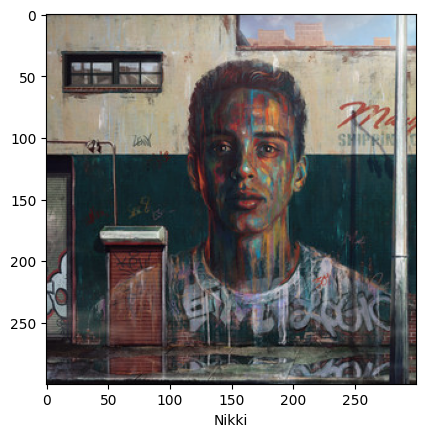

In [102]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Logic - Nikki'

id = projection_kmeans\
          .filter(projection_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

# id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]: Esta linha filtra o DataFrame projection_kmeans para encontrar o ID da música especificada pelo nome da música. O método collect()[0][0] é usado para obter o valor do ID da primeira linha do resultado da filtragem.
# track = sp.track(id): Aqui, você está usando a instância do objeto sp do Spotipy para obter informações detalhadas sobre a faixa com o ID obtido anteriormente. Isso inclui informações sobre o álbum da faixa.
# url = track["album"]["images"][1]["url"]: Você está acessando a URL da segunda imagem do álbum da faixa. A primeira imagem geralmente é uma imagem maior, enquanto a segunda é uma versão menor da capa do álbum, que pode ser mais adequada para exibir em um gráfico.
# name = track["name"]: Você está acessando o nome da faixa.
# image = io.imread(url): Aqui, você está usando skimage.io.imread() para carregar a imagem do URL.
# plt.imshow(image): Esta linha exibe a imagem carregada usando Matplotlib.
# plt.xlabel(name, fontsize=10): Você está adicionando um rótulo no eixo x do gráfico com o nome da faixa.
# plt.show(): Esta linha exibe o gráfico com a imagem da capa do álbum da faixa.


In [103]:
import matplotlib.pyplot as plt
from skimage import io

# exibir várias capas de álbuns de músicas em uma grade usando Matplotlib e a biblioteca skimage.io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

# plt.figure(figsize=(15,10)): Cria uma nova figura com o tamanho especificado.
# columns = 5: Define o número de colunas na grade.
# for i, u in enumerate(url): Itera sobre cada URL de imagem na lista url, juntamente com seu índice i.
# ax = plt.subplot(len(url) // columns + 1, columns, i + 1): Cria um novo sub-gráfico na posição i + 1 na grade. O número total de linhas na grade é determinado pela divisão do número total de URLs pelo número de colunas, mais uma.
# image = io.imread(u): Carrega a imagem do URL especificado.
# plt.imshow(image): Exibe a imagem carregada no sub-gráfico atual.
# ax.get_yaxis().set_visible(False): Oculta o eixo y do sub-gráfico para remover os números do eixo y.
# plt.xticks(color='w', fontsize=0.1): Define os rótulos do eixo x para ter cor branca e tamanho de fonte mínimo, fazendo-os praticamente invisíveis.
# plt.yticks(color='w', fontsize=0.1): Define os rótulos do eixo y para ter cor branca e tamanho de fonte mínimo, tornando-os praticamente invisíveis.
# plt.xlabel(name[i], fontsize=10): Adiciona um rótulo no eixo x do sub-gráfico com o nome da música correspondente.
# plt.tight_layout(h_pad=0.7, w_pad=0): Ajusta automaticamente os parâmetros do layout para que os sub-gráficos se encaixem bem na figura.
# plt.subplots_adjust(wspace=None, hspace=None): Ajusta automaticamente o espaço entre os sub-gráficos.
# plt.grid(visible=None): Desativa a grade no sub-gráfico.
# plt.show(): Exibe a figura completa com todos os sub-gráficos.


In [104]:
# construindo uma lista de nomes de faixas e URLs de imagens de capas de álbuns para uma lista de faixas recomendadas.
playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

# playlist_id = recomendadas.select('id').collect(): Isso coleta os IDs das faixas do DataFrame recomendadas.
# name = [] e url = []: Essas linhas inicializam listas vazias para armazenar os nomes das faixas e as URLs das imagens dos álbuns, respectivamente.
# for i in playlist_id: ...: Este loop itera sobre cada ID de faixa na lista playlist_id.
# track = sp.track(i[0]): Aqui, você usa o objeto Spotify sp para obter informações detalhadas sobre cada faixa com base no ID da faixa. Isso inclui informações sobre o álbum da faixa.
# url.append(track["album"]["images"][1]["url"]): Você acessa a URL da segunda imagem do álbum da faixa (que geralmente é uma imagem menor da capa do álbum) e a adiciona à lista url.
# name.append(track["name"]): Você acessa o nome da faixa e o adiciona à lista name.

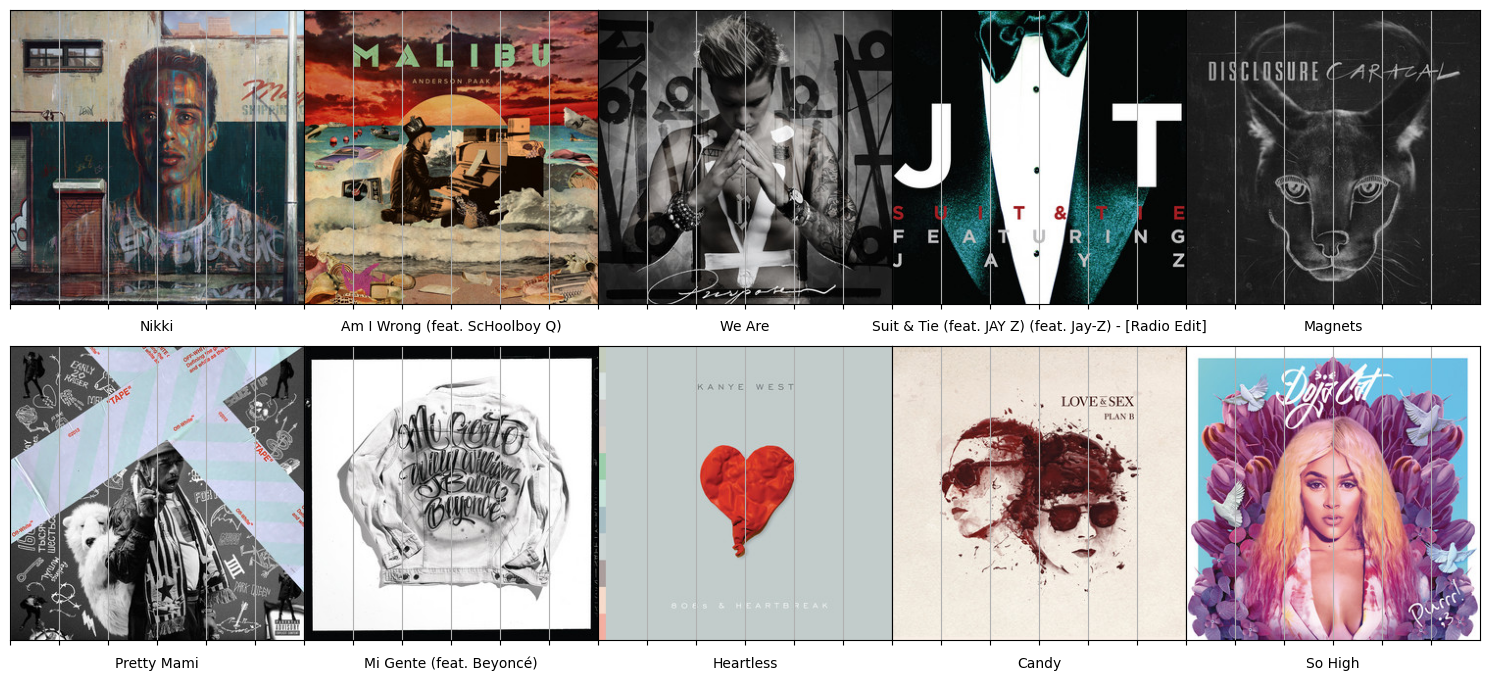

In [105]:
visualize_songs(name,url)

In [106]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas.
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster).select('artists_song', 'id', 'pca_features')
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
  .select('pca_features').collect()[0][0]

  def calcula_distance(valor):
    return euclidean(componentes_musica, valor)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())
  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
  musicas_recomendadas_dist.sort('Dist').take(10)
  recomendadas = session.createDataFrame(musicas_recomendadas_dist.sort('Dist'). take(10)).select(['artists_song', 'id', 'Dist'])

  # Pegar informações da API do Spotify

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

  # Plotando capas:
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
  plt.show()


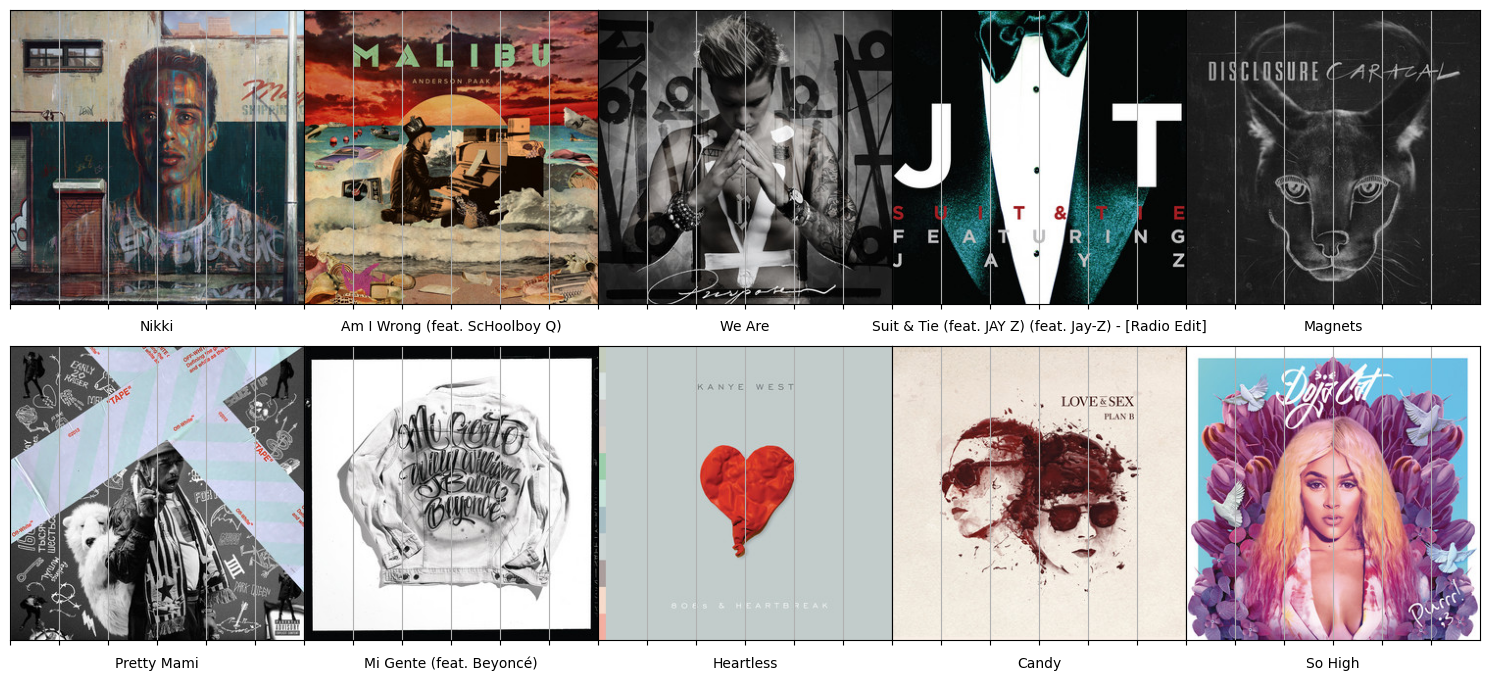

In [107]:
recomendador('Logic - Nikki')